In [3]:
!pip install wget
import wget 
wget.download('https://dropbox.com/s/f4rm8sjc3v99p0m/_end_seminar.xlsx?dl=1', 'end_seminar.xlsx')

100% [..............................................................................] 50735 / 50735

'end_seminar.xlsx'

In [4]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [110]:
data = pd.read_excel('end_seminar.xlsx')

In [111]:
data.head()

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student
0,2020-05-15 01:12:50.543,93ff79a51cd602f1dd3028ba2c129503,698,181.0,NaN,Язык SQL,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.183857,NaN,NaN,NaN
1,2020-05-15 02:46:48.066,26b01b1c4cd5656bab18d24c548834fb,647,181.0,NaN,Высокопроизводительные вычисления,Безопасность компьютерных систем,Язык SQL,Дискретная оптимизация,Численные методы,Машинное обучение 2,Нет,0.426009,NaN,NaN,NaN
2,2020-05-15 03:12:41.480,30f3653fc176d54e89ac3179c455c6dd,624,185.0,NaN,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Дискретная оптимизация,Машинное обучение 2,Численные методы,Да,0.538117,NaN,NaN,NaN
3,2020-05-15 04:43:08.994,1528f0eaa027580820ccf0d92a53ad68,579,182.0,NaN,Statistical Learning Theory,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.744395,NaN,NaN,NaN
4,2020-05-15 07:47:17.197,496ea4f0d4abe264b1bb1b80eb3830c5,572,183.0,NaN,Высокопроизводительные вычисления,Безопасность компьютерных систем,Теория баз данных,Компьютерные сети,Дискретная оптимизация,Численные методы,Да,0.780269,NaN,NaN,NaN


In [112]:
data.dtypes

timestamp        datetime64[ns]
id                       object
rating                    int64
18_group                float64
is_mi                   float64
fall_1                   object
fall_2                   object
fall_3                   object
spring_1                 object
spring_2                 object
spring_3                 object
is_first_time            object
percentile              float64
17_group                float64
blended                  object
is_ml_student           float64
dtype: object

In [113]:
data.select_dtypes(include=['object']).fillna('', inplace = True) 

In [114]:
data.select_dtypes(include=['float64','int64']).fillna(0, inplace = True)

In [115]:
data.head()

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student
0,2020-05-15 01:12:50.543,93ff79a51cd602f1dd3028ba2c129503,698,181.0,0.0,Язык SQL,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.183857,0.0,,0.0
1,2020-05-15 02:46:48.066,26b01b1c4cd5656bab18d24c548834fb,647,181.0,0.0,Высокопроизводительные вычисления,Безопасность компьютерных систем,Язык SQL,Дискретная оптимизация,Численные методы,Машинное обучение 2,Нет,0.426009,0.0,,0.0
2,2020-05-15 03:12:41.480,30f3653fc176d54e89ac3179c455c6dd,624,185.0,0.0,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Дискретная оптимизация,Машинное обучение 2,Численные методы,Да,0.538117,0.0,,0.0
3,2020-05-15 04:43:08.994,1528f0eaa027580820ccf0d92a53ad68,579,182.0,0.0,Statistical Learning Theory,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.744395,0.0,,0.0
4,2020-05-15 07:47:17.197,496ea4f0d4abe264b1bb1b80eb3830c5,572,183.0,0.0,Высокопроизводительные вычисления,Безопасность компьютерных систем,Теория баз данных,Компьютерные сети,Дискретная оптимизация,Численные методы,Да,0.780269,0.0,,0.0


Посмотрите повнимательнее на колонку 'is_first_time'.
Есть ли в ней ответы "Нет"? Сколько их?

Если вы найдете повторные обращения студентов, оставьте только самую позднюю версию. В дальнейших заданиях используйте версию данных без повторов.

Обращения со значением "Нет" в 'is_first_time' могут быть как повторными, так и первичными, поскольку поле заполняли сами студенты.

In [116]:
first_time = data[data['is_first_time'] == 'Нет']
first_time

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student
1,2020-05-15 02:46:48.066,26b01b1c4cd5656bab18d24c548834fb,647,181.0,0.0,Высокопроизводительные вычисления,Безопасность компьютерных систем,Язык SQL,Дискретная оптимизация,Численные методы,Машинное обучение 2,Нет,0.426009,0.0,,0.0
23,2020-05-15 22:30:31.902,a65d50ef4fadfac64508a54e972d8623,626,184.0,0.0,Безопасность компьютерных систем,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Анализ данных в бизнесе,Нет,0.526906,0.0,,0.0
27,2020-05-16 13:02:24.706,5daee1bd98559bb2c52373e416942225,593,182.0,0.0,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Моделирование временных рядов,Машинное обучение 2,Промышленное программирование на языке Java,Анализ данных в бизнесе,Нет,0.681614,0.0,,1.0
28,2020-05-16 14:40:48.012,64b63332f8e86fa32969cfe0c167dbea,684,186.0,0.0,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Высокопроизводительные вычисления,Машинное обучение 2,Анализ данных в бизнесе,Промышленное программирование на языке Java,Нет,0.251121,0.0,,0.0
30,2020-05-16 15:01:06.274,b121e4d7d62387cd5199cca464a34a6d,694,185.0,0.0,Безопасность компьютерных систем,Теория баз данных,Язык SQL,Машинное обучение 2,Компьютерные сети,Промышленное программирование на языке Java,Нет,0.204036,0.0,,0.0
33,2020-05-16 20:46:40.318,73282cacef07625adb2f9b4e2d57240e,575,183.0,0.0,Матричные вычисления,Язык SQL,Принятие решений в условиях риска и неопределё...,Дискретная оптимизация,Численные методы,Промышленное программирование на языке Java,Нет,0.762332,0.0,,0.0
66,2020-05-18 12:17:33.378,1f53f6dabcd59889dd7486a7cac5c9f2,569,187.0,0.0,Язык SQL,Матричные вычисления,Безопасность компьютерных систем,Компьютерные сети,Промышленное программирование на языке Java,Дополнительные главы прикладной статистики,Нет,0.789238,0.0,,0.0
68,2020-05-18 12:55:36.645,d61cc836b6aa3cdc4a40e2e8ada0b937,608,182.0,0.0,Безопасность компьютерных систем,Высокопроизводительные вычисления,Язык SQL,Компьютерные сети,Промышленное программирование на языке Java,Машинное обучение 2,Нет,0.614350,0.0,,0.0
75,2020-05-18 16:45:06.205,081eba3952cfc116e0e9b941d6a974a2,692,182.0,0.0,Безопасность компьютерных систем,Матричные вычисления,Теория баз данных,Промышленное программирование на языке Java,Дискретная оптимизация,Системы баз данных,Нет,0.215247,0.0,,1.0
83,2020-05-18 17:21:14.354,7f9d0f835bf734ccd4619041c3475c1c,689,182.0,0.0,Безопасность компьютерных систем,Statistical Learning Theory,Матричные вычисления,Дискретная оптимизация,Дополнительные главы прикладной статистики,Промышленное программирование на языке Java,Нет,0.228700,0.0,,1.0


In [117]:
len(data['id']) #проверяю длину и количество уникальных значений

361

In [118]:
data['id'].nunique() #не совпадает с длиной, значит, есть повторы 

347

In [119]:
array = data['id'].unique()

In [120]:
data1 = data.sort_values(by='timestamp')
data1 #отсортировала значения по дате

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student
223,2020-05-14 20:23:21.662,d555d2805e1d93d4f023e57dc4c8f403,996,0.0,0.0,Безопасность компьютерных систем,Глубинное обучение в обработке звука,Байесовские методы машинного обучения,Компьютерное зрение,Обучение с подкреплением,Проектирование и разработка высоконагруженных ...,Да,0.963768,172.0,DevOps,0.0
224,2020-05-14 20:47:13.833,253bbe1a2021d0404712a1e4acd22939,1106,0.0,0.0,Безопасность компьютерных систем,Моделирование временных рядов,Statistical Learning Theory,Проектирование и разработка высоконагруженных ...,Численные методы,Методы сжатия и передачи медиаданных,Да,0.673913,176.0,DevOps,0.0
225,2020-05-14 20:52:42.734,881b1a6fda195b354ae2edb396a69f5d,1084,0.0,0.0,Безопасность компьютерных систем,Анализ неструктурированных данных,Глубинное обучение в обработке звука,Компьютерное зрение,Проектирование и разработка высоконагруженных ...,Генеративные модели в машинном обучении,Да,0.782609,172.0,DevOps,0.0
226,2020-05-14 21:03:02.916,5a9b8ac11ad05b39a58b0e04a263bf4c,1170,0.0,0.0,Глубинное обучение в обработке звука,Statistical Learning Theory,Сбор и обработка данных с помощью краудсорсинга,Конфликты и кооперация,Обучение с подкреплением,Генеративные модели в машинном обучении,Да,0.442029,171.0,DevOps,0.0
227,2020-05-14 21:10:54.945,1bbbfae51794b83c769b634be8da7b8d,1078,0.0,0.0,Безопасность компьютерных систем,Высокопроизводительные вычисления,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Конфликты и кооперация,Да,0.789855,176.0,DevOps,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,2020-05-21 16:33:15.899,1341f488fae5f1ccf164960fd6506cd0,584,188.0,0.0,Язык SQL,Теория баз данных,Безопасность компьютерных систем,Промышленное программирование на языке Java,Компьютерные сети,Системы баз данных,Да,0.721973,0.0,,0.0
360,2020-05-23 21:16:40.916,f2d210ace25a841e1e58036b257d5d47,1195,0.0,0.0,Анализ неструктурированных данных,Моделирование временных рядов,Высокопроизводительные вычисления,Обучение с подкреплением,Компьютерное зрение,Методы сжатия и передачи медиаданных,,0.369565,176.0,Соревновательный анализ данных,0.0
359,2020-05-23 21:16:40.916,79d14db48e4737af731960ae212d5134,966,0.0,0.0,Безопасность компьютерных систем,Принятие решений в условиях риска и неопределё...,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Компьютерное зрение,Да,0.985507,172.0,DevOps,0.0
221,2020-05-24 01:21:31.946,04bcb5c9d23813ffa940e1febb27fadc,646,186.0,0.0,Теория баз данных,Высокопроизводительные вычисления,Безопасность компьютерных систем,Компьютерные сети,Дискретная оптимизация,Машинное обучение 2,Нет,0.430493,0.0,,0.0


In [121]:
data2 = data1[data1['id'].duplicated()==True]

In [123]:
data2

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student
23,2020-05-15 22:30:31.902,a65d50ef4fadfac64508a54e972d8623,626,184.0,0.0,Безопасность компьютерных систем,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Анализ данных в бизнесе,Нет,0.526906,0.0,,0.0
30,2020-05-16 15:01:06.274,b121e4d7d62387cd5199cca464a34a6d,694,185.0,0.0,Безопасность компьютерных систем,Теория баз данных,Язык SQL,Машинное обучение 2,Компьютерные сети,Промышленное программирование на языке Java,Нет,0.204036,0.0,,0.0
259,2020-05-17 15:55:40.828,906692ccd33f59058380aac1598c5480,1143,0.0,0.0,Анализ неструктурированных данных,Байесовские методы машинного обучения,Глубинное обучение в обработке звука,Обучение с подкреплением,Генеративные модели в машинном обучении,Компьютерное зрение,Нет,0.547101,172.0,DevOps,0.0
98,2020-05-18 18:53:41.094,5ee2ad618729a6dc3bdb7f2858826ef0,628,185.0,0.0,Безопасность компьютерных систем,Язык SQL,Теория баз данных,Компьютерные сети,Промышленное программирование на языке Java,Дискретная оптимизация,Нет,0.513453,0.0,,0.0
302,2020-05-18 20:23:36.111,9a66d84568b8017d98eb2e678b57296b,1205,0.0,0.0,Анализ неструктурированных данных,Глубинное обучение в обработке звука,Байесовские методы машинного обучения,Обучение с подкреплением,Генеративные модели в машинном обучении,Компьютерное зрение,Нет,0.293478,171.0,DevOps,0.0
126,2020-05-18 21:02:28.759,5c49473012411a1eee72f8ea63767adf,573,183.0,0.0,Безопасность компьютерных систем,Язык SQL,Теория баз данных,Промышленное программирование на языке Java,Компьютерные сети,Дискретная оптимизация,Нет,0.773543,0.0,,0.0
139,2020-05-18 21:27:02.445,ffc58d371e2f52e1c7f45d49d3d629d0,659,187.0,0.0,Матричные вычисления,Сбор и обработка данных с помощью краудсорсинга,Моделирование временных рядов,Системы баз данных,Промышленное программирование на языке Java,Дополнительные главы прикладной статистики,Нет,0.369955,0.0,,1.0
150,2020-05-18 21:49:22.233,f8fab519d78047712c06798c8b7fe38f,561,185.0,1.0,Моделирование временных рядов,Теория баз данных,Язык SQL,Промышленное программирование на языке Java,Машинное обучение 2,Компьютерные сети,Нет,0.822870,0.0,,0.0
152,2020-05-18 21:51:52.845,9015b809a29fb65ce23d7addf16d770d,665,188.0,1.0,Язык SQL,Моделирование временных рядов,Матричные вычисления,Машинное обучение 2,Промышленное программирование на языке Java,Компьютерные сети,Нет,0.338565,0.0,,0.0
325,2020-05-18 22:40:28.531,d9c068e5578253c2b0721558dd0813e1,1075,0.0,0.0,Анализ неструктурированных данных,Statistical Learning Theory,Принятие решений в условиях риска и неопределё...,Конфликты и кооперация,Обучение с подкреплением,Символьные вычисления,Нет,0.807971,174.0,DevOps,0.0


In [126]:
dupl_list = data2.index

In [127]:
dupl_list

Int64Index([23, 30, 259, 98, 302, 126, 139, 150, 152, 325, 176, 342, 192, 204], dtype='int64')

In [128]:
uniq_data = data1.drop(labels = dupl_list,axis = 0)

In [131]:
data = uniq_data.sort_index()

In [132]:
data

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student
0,2020-05-15 01:12:50.543,93ff79a51cd602f1dd3028ba2c129503,698,181.0,0.0,Язык SQL,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.183857,0.0,,0.0
1,2020-05-15 02:46:48.066,26b01b1c4cd5656bab18d24c548834fb,647,181.0,0.0,Высокопроизводительные вычисления,Безопасность компьютерных систем,Язык SQL,Дискретная оптимизация,Численные методы,Машинное обучение 2,Нет,0.426009,0.0,,0.0
2,2020-05-15 03:12:41.480,30f3653fc176d54e89ac3179c455c6dd,624,185.0,0.0,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Дискретная оптимизация,Машинное обучение 2,Численные методы,Да,0.538117,0.0,,0.0
3,2020-05-15 04:43:08.994,1528f0eaa027580820ccf0d92a53ad68,579,182.0,0.0,Statistical Learning Theory,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.744395,0.0,,0.0
4,2020-05-15 07:47:17.197,496ea4f0d4abe264b1bb1b80eb3830c5,572,183.0,0.0,Высокопроизводительные вычисления,Безопасность компьютерных систем,Теория баз данных,Компьютерные сети,Дискретная оптимизация,Численные методы,Да,0.780269,0.0,,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,2020-05-19 19:04:17.873,c5870b37ee3f672e4259dfb2fc02ed8f,1029,0.0,0.0,Statistical Learning Theory,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Обучение с подкреплением,Конфликты и кооперация,Компьютерное зрение,Да,0.920290,174.0,DevOps,0.0
357,2020-05-19 20:19:25.815,f44aea1095f9f5b8e2f5f0ed2b17891b,1060,0.0,0.0,Анализ неструктурированных данных,Высокопроизводительные вычисления,Моделирование временных рядов,Конфликты и кооперация,Обучение с подкреплением,Численные методы,Да,0.840580,174.0,DevOps,0.0
358,2020-05-20 11:54:38.318,d7118b44c7e8fdbbaaca226d2da6fef1,1111,0.0,0.0,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Численные методы,Да,0.652174,173.0,Соревновательный анализ данных,0.0
359,2020-05-23 21:16:40.916,79d14db48e4737af731960ae212d5134,966,0.0,0.0,Безопасность компьютерных систем,Принятие решений в условиях риска и неопределё...,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Компьютерное зрение,Да,0.985507,172.0,DevOps,0.0


In [139]:
len(data[data['17_group']>0]) # 17_group

134

In [140]:
len(data[data['17_group']==0]) # не 17_group

213

In [145]:
blended_list = data['blended'].unique()

In [207]:
blended_list

array(['', 'DevOps', 'Введение в дифференциальную геометрию',
       'Соревновательный анализ данных'], dtype=object)

In [208]:
blended = []
for i in blended_list:
    blended.append(i)

In [209]:
blended.remove('')

In [389]:
rating = []
for i in blended:
    for k in data['blended']:
        if k == i:
            count+=1
            data_bl = data[data['blended']==f'{i}']
            mean = data_bl['rating'].mean(axis=0)
    rating.append(mean)
    print (i, ':', count, ';   ', 'средний рейтинг:', mean)
    count = 0

DevOps : 87 ;    средний рейтинг: 1154.1724137931035
Введение в дифференциальную геометрию : 15 ;    средний рейтинг: 1210.7333333333333
Соревновательный анализ данных : 32 ;    средний рейтинг: 1144.21875


In [390]:
rating

[1154.1724137931035, 1210.7333333333333, 1144.21875]

In [391]:
max_rating = max(rating)

In [392]:
ind = rating.index(max_rating)
course = blended[ind]
print ('Студенты с самым высоким средним рейтингом посещают курс:', course, '; средний рейтинг:', "%.3f" % max_rating)

Студенты с самым высоким средним рейтингом посещают курс: Введение в дифференциальную геометрию ; средний рейтинг: 1210.733


In [393]:
data_17 = data[data['17_group']>0]
blended_17 = data_17['blended'].unique().tolist()
blended_17

['DevOps',
 'Введение в дифференциальную геометрию',
 'Соревновательный анализ данных']

In [394]:
data_18 = data[data['17_group']==0]
blended_18 = data_18['blended'].unique().tolist()
blended_18

['']

Постройте график рейтингов по дням получения ответов (bar plot).

In [446]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [447]:
import datetime

In [448]:
for_plot = data

In [449]:
for_plot = for_plot[['timestamp','rating']]

In [450]:
for_plot['timestamp'] = pd.to_datetime(for_plot['timestamp']).dt.date

C:\Users\User\AppData\Local\Temp\ipykernel_2640\3601720138.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for_plot['timestamp'] = pd.to_datetime(for_plot['timestamp']).dt.date


timestamp
2020-05-14    AxesSubplot(0.125,0.125;0.775x0.755)
2020-05-15    AxesSubplot(0.125,0.125;0.775x0.755)
2020-05-16    AxesSubplot(0.125,0.125;0.775x0.755)
2020-05-17    AxesSubplot(0.125,0.125;0.775x0.755)
2020-05-18    AxesSubplot(0.125,0.125;0.775x0.755)
2020-05-19    AxesSubplot(0.125,0.125;0.775x0.755)
2020-05-20    AxesSubplot(0.125,0.125;0.775x0.755)
2020-05-21    AxesSubplot(0.125,0.125;0.775x0.755)
2020-05-23    AxesSubplot(0.125,0.125;0.775x0.755)
2020-05-24    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

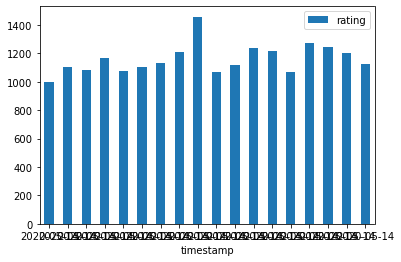

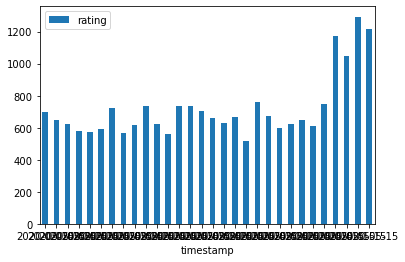

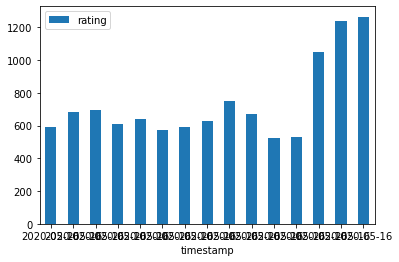

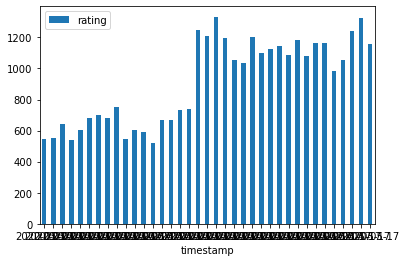

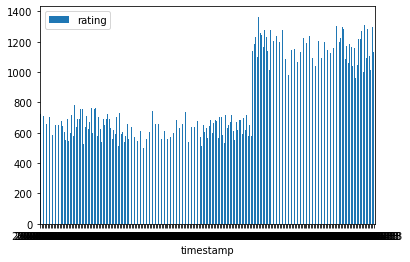

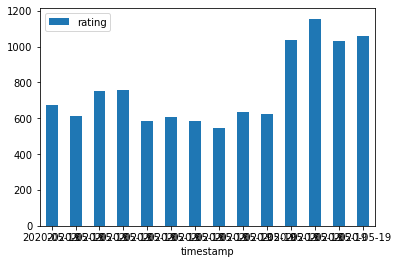

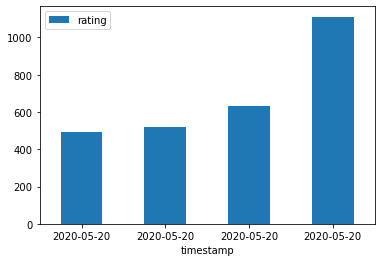

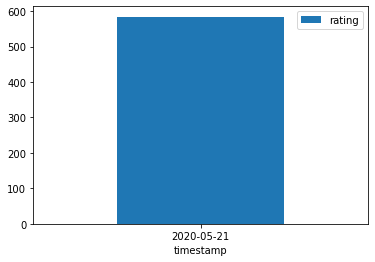

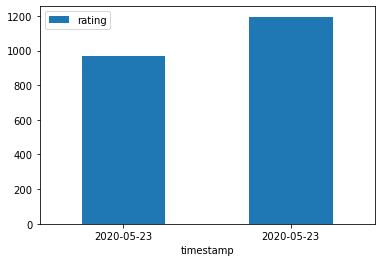

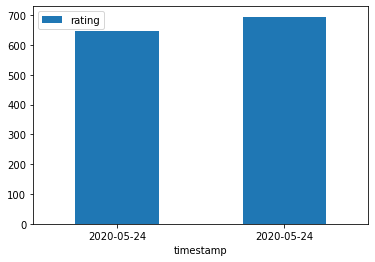

In [451]:
new_plot.plot.bar(x = 'timestamp', y = 'rating', rot = 0)